Mean Squared Error: 0.03865726738659497


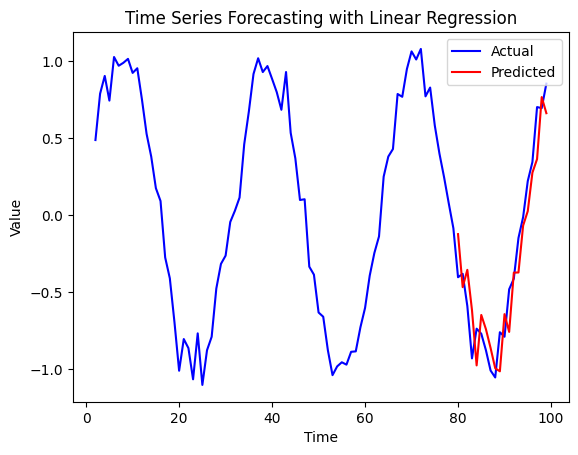

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Generate a simple time series dataset (e.g., a sine wave with noise)
np.random.seed(0)
time = np.arange(100)
data = np.sin(0.2 * time) + np.random.normal(scale=0.1, size=100)

# Create a pandas DataFrame
df = pd.DataFrame({'Time': time, 'Value': data})

# Prepare the data for regression
# We want to predict the next value based on previous time steps, so we'll create lag features
df['Lag1'] = df['Value'].shift(1)
df['Lag2'] = df['Value'].shift(2)

# Drop the rows with NaN values (due to shifting)
df = df.dropna()

# Define features (Lag1, Lag2) and target (Value)
X = df[['Lag1', 'Lag2']]
y = df['Value']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the results
plt.plot(df['Time'], df['Value'], label='Actual', color='blue')
plt.plot(df['Time'].iloc[len(X_train):], y_pred, label='Predicted', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Time Series Forecasting with Linear Regression')
plt.legend()
plt.show()